# Support Vector Regressor Implementation

In [2]:
# Importing library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# creating a synthetic data points

from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [5]:
X

array([[ 0.67695077, -0.88328026],
       [-1.27424358,  0.73538659],
       [-1.41716764,  1.24275068],
       ...,
       [-0.90912512,  1.21254617],
       [ 1.56536827,  0.44068871],
       [ 1.41325424,  0.44064319]])

In [6]:
y

array([ -15.07165501,  -32.07721934,   -9.54344368,  116.20637369,
        -17.94689364, -168.93564941, -139.080821  ,  119.51125338,
        151.39354487, -107.16548222,  140.90746925,   13.15900482,
         20.61661975,  -11.50147292,  -64.45478811, -102.16924311,
        -36.16828963,  -98.10150219, -152.19438463,   -5.70578677,
         82.07070714,   28.01425687, -151.44807677, -135.19850731,
         -5.30709658, -111.88271078,  -42.51292865,   35.11114427,
        121.09227666,   61.45217261,   76.34093671,  130.59203815,
       -152.72157818,  -13.93817909,    8.48850212, -176.54487202,
       -161.51042326,  -71.84279942,   30.74311563,  -94.27855217,
         -4.79139744,   64.80971428,   60.78653285, -237.71478158,
         17.21467437,   22.80655899,  -54.8781407 ,   50.05176501,
         79.63763296, -115.55628451,   72.38863445,  -70.61926685,
         38.25887008,  124.7779094 ,  -33.24090683,   79.14905404,
        104.06183513,  -30.12219535,   25.04786754,   38.70955

In [7]:
pd.DataFrame(X)[0]

0      0.676951
1     -1.274244
2     -1.417168
3      0.309025
4     -1.589178
         ...   
995    1.244676
996   -0.311944
997   -0.909125
998    1.565368
999    1.413254
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

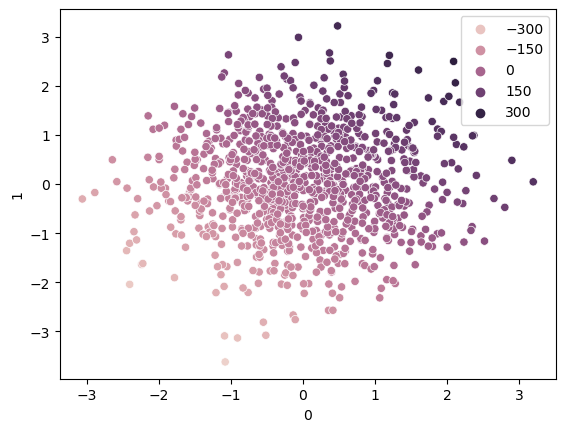

In [8]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr = SVR(kernel='linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[66.73933259, 71.80088573]])

In [14]:
## Prediction 

y_pred = svr.predict(X_test)

In [15]:
y_pred

array([ -14.35201142, -129.92681929,  -60.42868343,  141.6998779 ,
        -26.18490744,  116.13211559,  -82.90834615,   61.62138713,
         16.90044389,  -57.30454594,  -54.56198899,  -58.05101356,
        -70.20078768,   56.79673977,  -77.66378221,   11.46586331,
        116.84468824,   11.20781612,   33.28123131,  -55.21000187,
        -64.84208186,  180.83714987,   56.6760986 , -208.96149157,
         18.493309  ,  -35.89162837, -131.93953768,  -41.10466194,
        -25.19231387,    8.39155442,  -14.48059227,  141.47294402,
          1.26789254,  126.02894357,  139.98549518,  -83.74853853,
         11.38654191, -235.43491588,  138.66567693,   88.04124088,
       -131.81270276,    5.69206151,  -39.04742634,    8.57840853,
       -142.65973253,  -43.13237593,   59.30703386,   47.51875021,
         37.67724026,  -98.7436055 ,   29.38864335, -108.06133945,
       -239.00371205,  -43.38985287,   20.57087694,  113.48434677,
        -60.09151989,   65.50761509,  -44.86208175, -149.54148

In [16]:
from sklearn.metrics import r2_score

In [17]:
print(r2_score(y_test,y_pred))

0.9990771219365655


## Hyperparameter Tuning with SVR

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
# Defining Parameter Range

param_grid = {
    'C' : [0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    'kernel' : ['linear'],
    'epsilon' : [0.1,0.2,0.3]
}

In [20]:
grid = GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [21]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.740 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.725 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.733 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.735 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.734 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.740 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.725 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.733 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.735 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.734 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
## Prediction 

y_pred4 = 